In [2]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file=uproot.open('neutron_concrete00.root')["t"]
#open TTree t in the given root file

In [4]:
file.show()
#shows the branches and their interpretion as arrays

n                          (no streamer)              asdtype('>i4')
m                          (no streamer)              asdtype('>i4')
trk                        TStreamerSTL               asjagged(asdtype('>i4'), 10)
stp                        TStreamerSTL               asjagged(asdtype('>i4'), 10)
vlm                        TStreamerSTL               asjagged(asdtype('>i4'), 10)
pro                        TStreamerSTL               asjagged(asdtype('>i4'), 10)
pdg                        TStreamerSTL               asjagged(asdtype('>i4'), 10)
mom                        TStreamerSTL               asjagged(asdtype('>i4'), 10)
k                          TStreamerSTL               asjagged(asdtype('>f8'), 10)
p                          TStreamerSTL               asjagged(asdtype('>f8'), 10)
q                          TStreamerSTL               asjagged(asdtype('>f8'), 10)
t                          TStreamerSTL               asjagged(asdtype('>f8'), 10)
x                          TStre

In [5]:
file.title,file.name,file.numentries
#title,name, number of entries

(b'Geant4 step points', b't', 50000)

In [6]:
step=file.array("stp") #stp as numpy array

In [7]:
step

<JaggedArray [[2 3 4 ... 1 0 1] [2 3 4 ... 2 3 4] [2 0 1 ... 2 0 1] ... [2 3 4 ... 0 1 2] [2 3 4 ... 1 2 3] [2 3 4 ... 1 2 3]] at 0x7fc4eb5131d0>

In [8]:
global_corordinates=file.pandas.df("[xyz]0",entrystop=10)
#expresses x0, y0 and z0 as the data frame

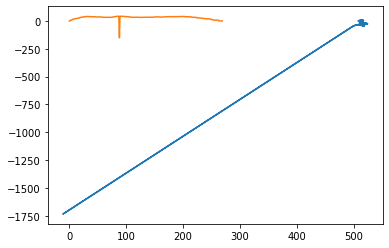

In [9]:
x01=global_corordinates["x0"][1]
y01=global_corordinates["y0"][1]
z01=global_corordinates["z0"][1]
plt.plot(x01,y01,z01)


In [11]:
#pdg as the numpy array
pdg=file.array('pdg')

In [25]:
len(pdg[1])

270

In [27]:
allpdg=[]
for i in range(len(pdg)):
    for j in range (len(pdg[i])):
        allpdg.append(pdg[i][j])
        

In [33]:
n=allpdg[allpdg==2112]

In [35]:
print(n)

2112


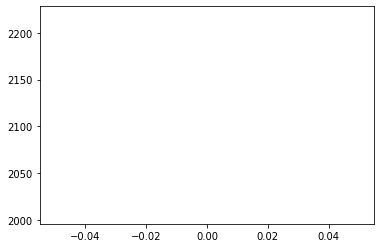

In [34]:
plt.plot(n)

In [19]:
pdg[:][:]

<JaggedArray [[2112 2112 2112 ... 1000080160 1000080160 1000080160] [2112 2112 2112 ... 2212 2212 2212] [2112 22 22 ... 2212 2212 2212] ... [2112 2112 2112 ... 2212 2212 2212] [2112 2112 2112 ... 2212 2212 2212] [2112 2112 2112 ... 2212 2212 2212]] at 0x7faf88a32dd0>

In [22]:
pdg.shape

(50000,)

In [25]:
dfpdg=file.pandas.df('pdg')

In [26]:
dfpdg[:3]

pdg
entry subentry      
0     0         2112
      1         2112
      2         2112

In [28]:
dfpdg['pdg']

entry  subentry
0      0                 2112
       1                 2112
       2                 2112
       3                   22
       4                   22
       5                  -11
       6                  -11
       7                  -11
       8                  -11
       9                   22
       10                  22
       11                  22
       12                  22
       13                  22
       14                  22
       15                  22
       16                  22
       17                  22
       18                  22
       19                  11
       20                  11
       21                  11
       22          1000080160
       23          1000080160
       24                2112
       25                2112
       26                2112
       27                2112
       28                2112
       29                2112
                      ...    
49999  432               2212
       433              

In [29]:
dfpdg.filter(items=["pdg"])

pdg
entry subentry            
0     0               2112
      1               2112
      2               2112
      3                 22
      4                 22
      5                -11
      6                -11
      7                -11
      8                -11
      9                 22
      10                22
      11                22
      12                22
      13                22
      14                22
      15                22
      16                22
      17                22
      18                22
      19                11
      20                11
      21                11
      22        1000080160
      23        1000080160
      24              2112
      25              2112
      26              2112
      27              2112
      28              2112
      29              2112
...                    ...
49999 432             2212
      433             2212
      434             2212
      435             2212
      436             2212
      437             2212
      438             2212
      439             2212
      440             2212
      441             2212
      442             2212
      443             2212
      444             2212
      445             2212
      446             2212
      447             2212
      448             2212
      449             2212
      450             2212
      451             2212
      452             2212
      453             2212
      454             2212
      455             2212
      456             2212
      457             2212
      458             2212
      459             2212
      460             2212
      461             2212

[12165623 rows x 1 columns]

In [31]:
dfpdg.tail

<bound method NDFrame.tail of                        pdg
entry subentry            
0     0               2112
      1               2112
      2               2112
      3                 22
      4                 22
      5                -11
      6                -11
      7                -11
      8                -11
      9                 22
      10                22
      11                22
      12                22
      13                22
      14                22
      15                22
      16                22
      17                22
      18                22
      19                11
      20                11
      21                11
      22        1000080160
      23        1000080160
      24              2112
      25              2112
      26              2112
      27              2112
      28              2112
      29              2112
...                    ...
49999 432             2212
      433             2212
      434             221

In [33]:
#unstack
dfpdg=dfpdg.unstack()

In [34]:
dfpdg.head()

pdg                                                      \
subentry    0       1       2       3             4             5      
entry                                                                  
0         2112.0  2112.0  2112.0    22.0  2.200000e+01 -1.100000e+01   
1         2112.0  2112.0  2112.0  2112.0  2.112000e+03  2.112000e+03   
2         2112.0    22.0    22.0    22.0  2.200000e+01  2.200000e+01   
3         2112.0    22.0    22.0    22.0  1.000060e+09  1.000060e+09   
4         2112.0  2112.0  2112.0  2112.0  2.112000e+03  2.112000e+03   

                                                     ...                       \
subentry          6             7       8       9    ...  2082 2083 2084 2085   
entry                                                ...                        
0        -1.100000e+01 -1.100000e+01   -11.0    22.0 ...   NaN  NaN  NaN  NaN   
1         2.112000e+03  2.112000e+03  2112.0  2112.0 ...   NaN  NaN  NaN  NaN   
2         2.200000e+01  2.200000e+01    11.0    11.0 ...   NaN  NaN  NaN  NaN   
3         1.000020e+09  1.000020e+09  2112.0  2112.0 ...   NaN  NaN  NaN  NaN   
4         2.112000e+03  2.112000e+03  2112.0  2112.0 ...   NaN  NaN  NaN  NaN   

                                        
subentry 2086 2087 2088 2089 2090 2091  
entry                                   
0         NaN  NaN  NaN  NaN  NaN  NaN  
1         NaN  NaN  NaN  NaN  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 2092 columns]

In [36]:
dfpdg.loc[0]

     subentry
pdg  0           2.112000e+03
     1           2.112000e+03
     2           2.112000e+03
     3           2.200000e+01
     4           2.200000e+01
     5          -1.100000e+01
     6          -1.100000e+01
     7          -1.100000e+01
     8          -1.100000e+01
     9           2.200000e+01
     10          2.200000e+01
     11          2.200000e+01
     12          2.200000e+01
     13          2.200000e+01
     14          2.200000e+01
     15          2.200000e+01
     16          2.200000e+01
     17          2.200000e+01
     18          2.200000e+01
     19          1.100000e+01
     20          1.100000e+01
     21          1.100000e+01
     22          1.000080e+09
     23          1.000080e+09
     24          2.112000e+03
     25          2.112000e+03
     26          2.112000e+03
     27          2.112000e+03
     28          2.112000e+03
     29          2.112000e+03
                     ...     
     2062                 NaN
     2063                 

In [37]:
pd.set_option('display.precision',10)

In [40]:
dfpdg=dfpdg.dropna

In [44]:
dfpdg

<bound method DataFrame.dropna of              pdg                                                      \
subentry    0       1       2       3             4             5      
entry                                                                  
0         2112.0  2112.0  2112.0    22.0          22.0         -11.0   
1         2112.0  2112.0  2112.0  2112.0        2112.0        2112.0   
2         2112.0    22.0    22.0    22.0          22.0          22.0   
3         2112.0    22.0    22.0    22.0  1000060120.0  1000060120.0   
4         2112.0  2112.0  2112.0  2112.0        2112.0        2112.0   
5         2112.0  2112.0  2112.0  2112.0        2112.0        2112.0   
6         2112.0  2112.0  2112.0  2112.0        2112.0        2112.0   
7         2112.0  2112.0  2112.0    22.0          22.0          22.0   
8         2112.0  2112.0  2112.0  2112.0        2112.0        2112.0   
9         2112.0  2112.0    22.0    22.0          22.0          22.0   
10        2112.0    22.0    22